# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t0_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,140.123212,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
0,380.0,382.0,587.0,593.0,588.0,778.0,657.0,767.0,847.0,863.0,...,943.0,922.0,976.0,1115.0,962.0,1023.0,1051.0,1060.0,1016.0,1060.0
1,348.0,444.0,538.0,597.0,572.0,775.0,649.0,696.0,738.0,844.0,...,988.0,979.0,1011.0,1030.0,1072.0,1058.0,1043.0,1050.0,998.0,1068.0
2,330.0,523.0,555.0,558.0,624.0,732.0,692.0,762.0,739.0,906.0,...,1029.0,1075.0,1024.0,1090.0,975.0,1125.0,1052.0,1099.0,1067.0,1100.0
3,329.0,435.0,533.0,526.0,589.0,695.0,630.0,739.0,744.0,819.0,...,1019.0,1088.0,1122.0,1077.0,1132.0,1086.0,1039.0,1098.0,1023.0,1154.0
4,388.0,498.0,579.0,585.0,573.0,768.0,694.0,678.0,810.0,840.0,...,1097.0,1033.0,1096.0,1071.0,1030.0,1104.0,1072.0,1096.0,1157.0,1173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,365.0,508.0,588.0,539.0,630.0,709.0,621.0,723.0,768.0,871.0,...,809.0,830.0,864.0,829.0,861.0,877.0,924.0,831.0,877.0,921.0
335,397.0,390.0,531.0,548.0,549.0,731.0,621.0,752.0,778.0,853.0,...,826.0,844.0,808.0,832.0,850.0,849.0,866.0,881.0,852.0,895.0
336,353.0,450.0,613.0,528.0,612.0,743.0,656.0,735.0,789.0,866.0,...,878.0,863.0,963.0,841.0,844.0,867.0,904.0,816.0,911.0,922.0
337,389.0,443.0,588.0,493.0,557.0,695.0,596.0,668.0,699.0,790.0,...,851.0,825.0,882.0,821.0,903.0,935.0,863.0,911.0,837.0,951.0


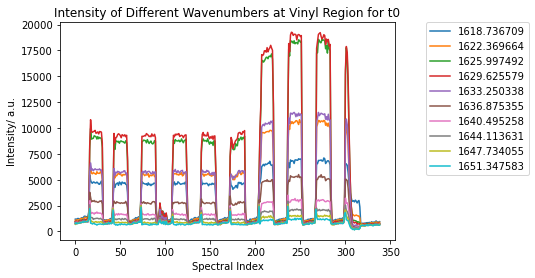

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t0')
plt.legend(bbox_to_anchor=(1.4,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [5]:
# df.loc[:,'1629.625579'] --> When using loc.
df.columns.get_loc('1629.625579') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.625579'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

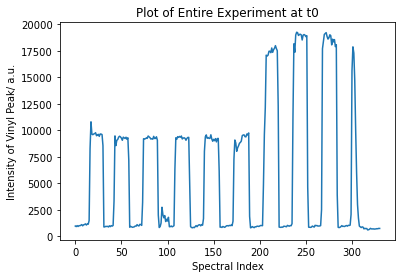

In [6]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:330,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t0')
plt.show()

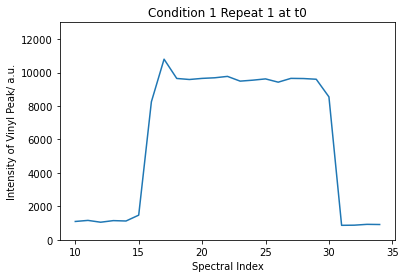

In [10]:
# Condition 
condition1 = df.iloc[10:35,:] 
condition1.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 1 at t0')
plt.ylim(0,13000) # Zoom in to relevant spectral range.
plt.show()

In [22]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = condition1.loc[22:26, :]
condition1_ss.insert(loc = 0, column = 'Condition', value ='C1_R1')
condition1_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
22,C1_R1,7568.0,8668.0,8743.0,8222.0,7493.0,6942.0,6267.0,5602.0,5254.0,...,114.0,178.0,127.0,150.0,159.0,135.0,108.0,166.0,106.0,177.0
23,C1_R1,7780.0,8624.0,8757.0,8248.0,7569.0,6829.0,5976.0,5624.0,5310.0,...,75.0,125.0,171.0,113.0,152.0,124.0,116.0,103.0,64.0,167.0
24,C1_R1,7834.0,8553.0,8794.0,8230.0,7544.0,6804.0,6247.0,5684.0,5218.0,...,121.0,106.0,142.0,106.0,237.0,111.0,108.0,144.0,72.0,83.0
25,C1_R1,7778.0,8646.0,8757.0,8121.0,7316.0,6940.0,6145.0,5780.0,5425.0,...,113.0,120.0,128.0,173.0,169.0,195.0,94.0,153.0,103.0,161.0
26,C1_R1,7508.0,8551.0,8896.0,8350.0,7573.0,6798.0,6151.0,5792.0,5352.0,...,92.0,146.0,68.0,170.0,169.0,153.0,126.0,164.0,128.0,162.0


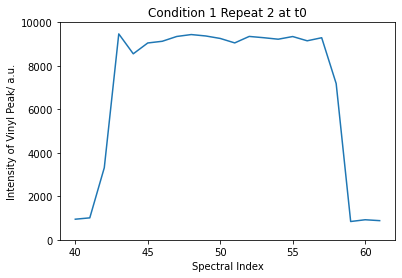

In [23]:
# condition 
condition2 = df.iloc[40:62,:] 
condition2.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 2 at t0')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [24]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = condition2.loc[50:54, :]
condition2_ss.insert(loc = 0, column = 'Condition', value ='C1_R2')
condition2_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
50,C1_R2,7750.0,8461.0,8613.0,8261.0,7573.0,6707.0,6138.0,5501.0,5136.0,...,54.0,105.0,103.0,93.0,169.0,117.0,72.0,152.0,66.0,152.0
51,C1_R2,7455.0,8472.0,8653.0,8229.0,7460.0,6977.0,6207.0,5500.0,5292.0,...,116.0,112.0,122.0,118.0,113.0,139.0,133.0,125.0,102.0,178.0
52,C1_R2,7600.0,8480.0,8625.0,8325.0,7580.0,6908.0,6168.0,5711.0,5262.0,...,128.0,100.0,150.0,134.0,167.0,140.0,152.0,169.0,127.0,153.0
53,C1_R2,7760.0,8373.0,8706.0,8201.0,7540.0,6936.0,6284.0,5655.0,5100.0,...,24.0,85.0,130.0,73.0,149.0,138.0,94.0,101.0,106.0,98.0
54,C1_R2,7667.0,8644.0,8689.0,8111.0,7478.0,6843.0,6124.0,5532.0,5401.0,...,80.0,66.0,124.0,136.0,159.0,99.0,127.0,130.0,62.0,129.0


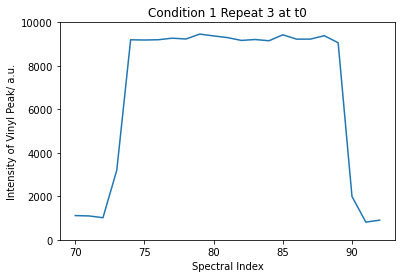

In [25]:
# Condition
condition3 = df.iloc[70:93,:] 
condition3.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 3 at t0')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [26]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = condition3.loc[80:84, :]
condition3_ss.insert(loc = 0, column = 'Condition', value = 'C1_R3')
condition3_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
80,C1_R3,7552.0,8347.0,8491.0,8157.0,7610.0,6911.0,6065.0,5695.0,5160.0,...,95.0,91.0,96.0,129.0,100.0,158.0,79.0,129.0,44.0,125.0
81,C1_R3,7524.0,8618.0,8797.0,8052.0,7418.0,6996.0,6251.0,5668.0,5142.0,...,129.0,84.0,172.0,120.0,191.0,126.0,134.0,140.0,80.0,119.0
82,C1_R3,7451.0,8566.0,8676.0,8183.0,7442.0,6955.0,6094.0,5662.0,5210.0,...,87.0,58.0,85.0,76.0,121.0,149.0,60.0,92.0,85.0,112.0
83,C1_R3,7512.0,8369.0,8624.0,8200.0,7403.0,6838.0,6087.0,5538.0,5164.0,...,68.0,142.0,103.0,144.0,166.0,92.0,113.0,124.0,60.0,137.0
84,C1_R3,7432.0,8501.0,8625.0,7884.0,7296.0,6779.0,6039.0,5492.0,5225.0,...,60.0,114.0,78.0,137.0,126.0,131.0,90.0,90.0,105.0,104.0


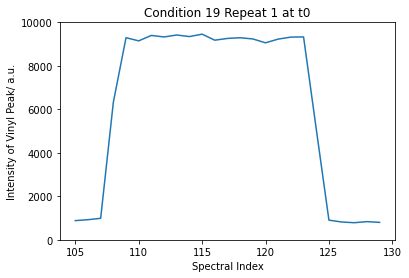

In [27]:
# Condition
condition4 = df.iloc[105:130,:] 
condition4.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 1 at t0')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [28]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = condition4.loc[115:119, :]
condition4_ss.insert(loc = 0, column = 'Condition', value = 'C19_R1')
condition4_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
115,C19_R1,7623.0,8441.0,8695.0,8188.0,7613.0,6833.0,6087.0,5671.0,5199.0,...,44.0,68.0,103.0,87.0,153.0,85.0,75.0,101.0,48.0,100.0
116,C19_R1,7541.0,8242.0,8506.0,7840.0,7291.0,6715.0,5986.0,5561.0,5249.0,...,120.0,121.0,164.0,91.0,136.0,170.0,231.0,148.0,124.0,148.0
117,C19_R1,7720.0,8434.0,8610.0,8199.0,7519.0,6775.0,6172.0,5704.0,5255.0,...,105.0,103.0,108.0,131.0,130.0,125.0,101.0,101.0,59.0,131.0
118,C19_R1,7761.0,8535.0,8663.0,8324.0,7496.0,6910.0,6269.0,5691.0,5354.0,...,99.0,117.0,109.0,133.0,129.0,90.0,110.0,102.0,78.0,119.0
119,C19_R1,7686.0,8467.0,8761.0,8304.0,7568.0,6874.0,5892.0,5816.0,5103.0,...,65.0,108.0,106.0,146.0,143.0,105.0,83.0,142.0,110.0,104.0


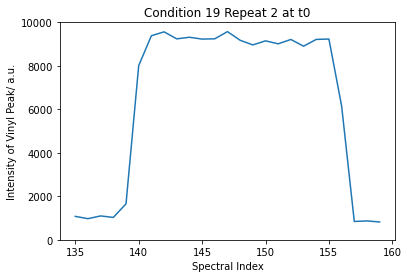

In [30]:
# Condition
condition5 = df.iloc[135:160,:] 
condition5.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 2 at t0')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [31]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = condition5.loc[150:154, :]
condition5_ss.insert(loc = 0, column = 'Condition', value = 'C19_R2')
condition5_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
150,C19_R2,7693.0,8503.0,8590.0,7981.0,7619.0,6731.0,5987.0,5686.0,5292.0,...,47.0,66.0,75.0,100.0,125.0,146.0,132.0,132.0,35.0,107.0
151,C19_R2,7412.0,8044.0,8322.0,7925.0,7089.0,6581.0,5841.0,5440.0,5155.0,...,169.0,160.0,123.0,149.0,196.0,151.0,139.0,168.0,155.0,188.0
152,C19_R2,7669.0,8595.0,8787.0,8284.0,7483.0,6807.0,6158.0,5444.0,5224.0,...,122.0,98.0,105.0,115.0,93.0,145.0,97.0,97.0,96.0,125.0
153,C19_R2,7337.0,8295.0,8414.0,7949.0,7304.0,6569.0,5999.0,5518.0,5120.0,...,108.0,121.0,110.0,171.0,126.0,152.0,94.0,170.0,89.0,161.0
154,C19_R2,7606.0,8238.0,8752.0,8284.0,7704.0,6887.0,6241.0,5750.0,5290.0,...,110.0,123.0,114.0,110.0,123.0,126.0,107.0,99.0,51.0,85.0


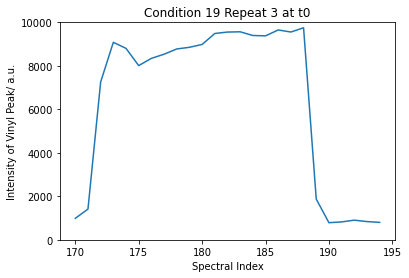

In [33]:
# Condition
condition6 = df.iloc[170:195,:] 
condition6.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 3 at t0')
plt.ylim(0,10000) # Zoom in to relevant spectral range.
plt.show()

In [34]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = condition6.loc[183:187, :]
condition6_ss.insert(loc = 0, column = 'Condition', value = 'C19_R3')
condition6_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
183,C19_R3,7628.0,8516.0,8816.0,8161.0,7375.0,6830.0,6144.0,5686.0,5344.0,...,72.0,57.0,156.0,61.0,47.0,134.0,60.0,74.0,72.0,109.0
184,C19_R3,7728.0,8593.0,8897.0,8273.0,7789.0,7054.0,6132.0,5517.0,5246.0,...,134.0,62.0,136.0,124.0,122.0,101.0,129.0,128.0,50.0,141.0
185,C19_R3,7646.0,8762.0,8901.0,8268.0,7337.0,6900.0,6186.0,5476.0,5277.0,...,87.0,71.0,93.0,114.0,101.0,92.0,91.0,116.0,48.0,111.0
186,C19_R3,7727.0,8671.0,8789.0,8356.0,7678.0,6952.0,6232.0,5655.0,5244.0,...,54.0,67.0,86.0,48.0,102.0,125.0,92.0,65.0,68.0,159.0
187,C19_R3,7621.0,8606.0,8761.0,8430.0,7632.0,6992.0,6264.0,5710.0,5406.0,...,100.0,103.0,147.0,107.0,139.0,129.0,102.0,59.0,86.0,90.0


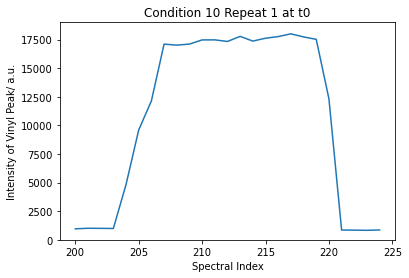

In [38]:
# Condition
condition7 = df.iloc[200:225,:] 
condition7.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 1 at t0')
plt.ylim(0,19000) # Zoom in to relevant spectral range.
plt.show()

In [39]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = condition7.loc[213:217, :]
condition7_ss.insert(loc = 0, column = 'Condition', value = 'C10_R1')
condition7_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
213,C10_R1,9326.0,10360.0,10612.0,10219.0,9421.0,8467.0,7845.0,7216.0,6706.0,...,97.0,47.0,101.0,93.0,160.0,132.0,164.0,100.0,89.0,137.0
214,C10_R1,8964.0,10079.0,10625.0,10133.0,9516.0,8531.0,7843.0,7119.0,6742.0,...,70.0,135.0,112.0,130.0,128.0,131.0,111.0,101.0,74.0,156.0
215,C10_R1,9039.0,10288.0,10422.0,9907.0,9179.0,8781.0,7865.0,7357.0,6739.0,...,86.0,57.0,85.0,130.0,104.0,174.0,96.0,132.0,26.0,169.0
216,C10_R1,9395.0,10332.0,10453.0,10030.0,9497.0,8729.0,7866.0,7304.0,6915.0,...,133.0,93.0,143.0,108.0,181.0,86.0,120.0,99.0,84.0,74.0
217,C10_R1,9058.0,10314.0,10652.0,10300.0,9479.0,8873.0,7964.0,7228.0,6835.0,...,94.0,89.0,131.0,139.0,119.0,146.0,119.0,89.0,78.0,103.0


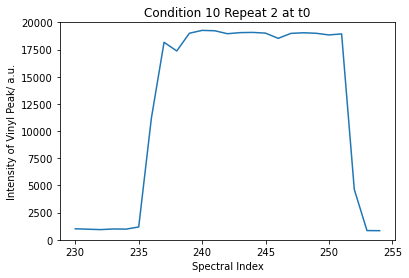

In [41]:
# Condition
condition8 = df.iloc[230:255,:] 
condition8.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 2 at t0')
plt.ylim(0,20000) # Zoom in to relevant spectral range.
plt.show()

In [42]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = condition8.loc[245:249, :]
condition8_ss.insert(loc = 0, column = 'Condition', value = 'C10_R2')
condition8_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
245,C10_R2,9518.0,10398.0,11104.0,10600.0,9528.0,8826.0,8169.0,7625.0,6982.0,...,67.0,137.0,117.0,77.0,192.0,74.0,94.0,88.0,78.0,107.0
246,C10_R2,9265.0,10626.0,10939.0,10330.0,9800.0,8752.0,8136.0,7691.0,6992.0,...,144.0,120.0,150.0,179.0,175.0,93.0,173.0,168.0,60.0,190.0
247,C10_R2,9188.0,10403.0,10683.0,10520.0,9932.0,8873.0,8185.0,7595.0,6955.0,...,114.0,105.0,137.0,128.0,135.0,148.0,108.0,190.0,95.0,160.0
248,C10_R2,9378.0,10800.0,10961.0,10491.0,9843.0,8986.0,8267.0,7520.0,6951.0,...,129.0,103.0,112.0,153.0,201.0,169.0,143.0,127.0,118.0,135.0
249,C10_R2,9379.0,10571.0,10837.0,10451.0,9894.0,8934.0,8185.0,7445.0,7013.0,...,90.0,102.0,144.0,125.0,132.0,125.0,105.0,113.0,82.0,100.0


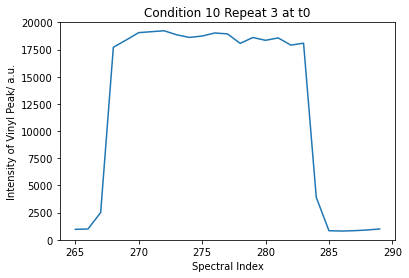

In [44]:
# Condition
condition9 = df.iloc[265:290,:] 
condition9.loc[:,'1629.625579'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 3 at t0')
plt.ylim(0,20000) # Zoom in to relevant spectral range.
plt.show()

In [51]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = condition9.loc[273:277, :]
condition9_ss.insert(loc = 0, column = 'Condition', value = 'C10_R3')
condition9_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
273,C10_R3,9379.0,10487.0,10994.0,10168.0,9670.0,9124.0,8037.0,7489.0,7139.0,...,81.0,84.0,84.0,130.0,124.0,80.0,79.0,114.0,106.0,126.0
274,C10_R3,9344.0,10573.0,10870.0,10511.0,9758.0,8901.0,8113.0,7672.0,7080.0,...,78.0,122.0,109.0,109.0,112.0,95.0,97.0,133.0,73.0,140.0
275,C10_R3,9434.0,10639.0,10865.0,10482.0,9755.0,9030.0,8052.0,7378.0,7114.0,...,125.0,115.0,129.0,108.0,179.0,137.0,128.0,116.0,83.0,156.0
276,C10_R3,9316.0,10506.0,10794.0,10510.0,9688.0,8918.0,8221.0,7481.0,6883.0,...,116.0,90.0,141.0,133.0,178.0,121.0,123.0,136.0,113.0,116.0
277,C10_R3,9531.0,10547.0,11003.0,10426.0,9771.0,9163.0,8102.0,7497.0,6898.0,...,75.0,90.0,131.0,122.0,132.0,175.0,66.0,95.0,98.0,115.0


In [52]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
22,C1_R1,7568.0,8668.0,8743.0,8222.0,7493.0,6942.0,6267.0,5602.0,5254.0,...,114.0,178.0,127.0,150.0,159.0,135.0,108.0,166.0,106.0,177.0
23,C1_R1,7780.0,8624.0,8757.0,8248.0,7569.0,6829.0,5976.0,5624.0,5310.0,...,75.0,125.0,171.0,113.0,152.0,124.0,116.0,103.0,64.0,167.0
24,C1_R1,7834.0,8553.0,8794.0,8230.0,7544.0,6804.0,6247.0,5684.0,5218.0,...,121.0,106.0,142.0,106.0,237.0,111.0,108.0,144.0,72.0,83.0
25,C1_R1,7778.0,8646.0,8757.0,8121.0,7316.0,6940.0,6145.0,5780.0,5425.0,...,113.0,120.0,128.0,173.0,169.0,195.0,94.0,153.0,103.0,161.0
26,C1_R1,7508.0,8551.0,8896.0,8350.0,7573.0,6798.0,6151.0,5792.0,5352.0,...,92.0,146.0,68.0,170.0,169.0,153.0,126.0,164.0,128.0,162.0
50,C1_R2,7750.0,8461.0,8613.0,8261.0,7573.0,6707.0,6138.0,5501.0,5136.0,...,54.0,105.0,103.0,93.0,169.0,117.0,72.0,152.0,66.0,152.0
51,C1_R2,7455.0,8472.0,8653.0,8229.0,7460.0,6977.0,6207.0,5500.0,5292.0,...,116.0,112.0,122.0,118.0,113.0,139.0,133.0,125.0,102.0,178.0
52,C1_R2,7600.0,8480.0,8625.0,8325.0,7580.0,6908.0,6168.0,5711.0,5262.0,...,128.0,100.0,150.0,134.0,167.0,140.0,152.0,169.0,127.0,153.0
53,C1_R2,7760.0,8373.0,8706.0,8201.0,7540.0,6936.0,6284.0,5655.0,5100.0,...,24.0,85.0,130.0,73.0,149.0,138.0,94.0,101.0,106.0,98.0
54,C1_R2,7667.0,8644.0,8689.0,8111.0,7478.0,6843.0,6124.0,5532.0,5401.0,...,80.0,66.0,124.0,136.0,159.0,99.0,127.0,130.0,62.0,129.0


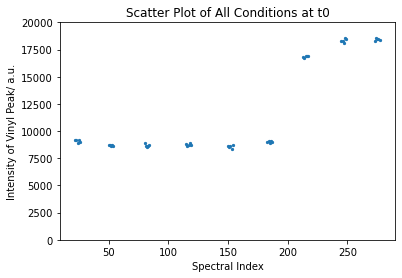

In [54]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t0')
plt.ylim(0, 20000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [55]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [56]:
# Inspect df_.
df_

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
22,C1_R1,7568.0,8668.0,8743.0,8222.0,7493.0,6942.0,6267.0,5602.0,5254.0,...,114.0,178.0,127.0,150.0,159.0,135.0,108.0,166.0,106.0,177.0
23,C1_R1,7780.0,8624.0,8757.0,8248.0,7569.0,6829.0,5976.0,5624.0,5310.0,...,75.0,125.0,171.0,113.0,152.0,124.0,116.0,103.0,64.0,167.0
24,C1_R1,7834.0,8553.0,8794.0,8230.0,7544.0,6804.0,6247.0,5684.0,5218.0,...,121.0,106.0,142.0,106.0,237.0,111.0,108.0,144.0,72.0,83.0
25,C1_R1,7778.0,8646.0,8757.0,8121.0,7316.0,6940.0,6145.0,5780.0,5425.0,...,113.0,120.0,128.0,173.0,169.0,195.0,94.0,153.0,103.0,161.0
26,C1_R1,7508.0,8551.0,8896.0,8350.0,7573.0,6798.0,6151.0,5792.0,5352.0,...,92.0,146.0,68.0,170.0,169.0,153.0,126.0,164.0,128.0,162.0
50,C1_R2,7750.0,8461.0,8613.0,8261.0,7573.0,6707.0,6138.0,5501.0,5136.0,...,54.0,105.0,103.0,93.0,169.0,117.0,72.0,152.0,66.0,152.0
51,C1_R2,7455.0,8472.0,8653.0,8229.0,7460.0,6977.0,6207.0,5500.0,5292.0,...,116.0,112.0,122.0,118.0,113.0,139.0,133.0,125.0,102.0,178.0
52,C1_R2,7600.0,8480.0,8625.0,8325.0,7580.0,6908.0,6168.0,5711.0,5262.0,...,128.0,100.0,150.0,134.0,167.0,140.0,152.0,169.0,127.0,153.0
53,C1_R2,7760.0,8373.0,8706.0,8201.0,7540.0,6936.0,6284.0,5655.0,5100.0,...,24.0,85.0,130.0,73.0,149.0,138.0,94.0,101.0,106.0,98.0
54,C1_R2,7667.0,8644.0,8689.0,8111.0,7478.0,6843.0,6124.0,5532.0,5401.0,...,80.0,66.0,124.0,136.0,159.0,99.0,127.0,130.0,62.0,129.0


In [57]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.625579']].groupby('Condition').describe()

1629.625579                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
C10_R1            5.0  17701.0  233.263799  17363.0  17615.0  17755.0   
C10_R2            5.0  18912.6  214.992558  18530.0  18986.0  18994.0   
C10_R3            5.0  18834.4  160.817599  18616.0  18741.0  18853.0   
C19_R1            5.0   9285.6  104.344621   9180.0   9237.0   9261.0   
C19_R2            5.0   9099.2  136.662724   8904.0   9013.0   9150.0   
C19_R3            5.0   9509.4  117.268069   9379.0   9396.0   9556.0   
C1_R1             5.0   9568.8  133.735560   9424.0   9486.0   9544.0   
C1_R2             5.0   9237.4  112.362360   9055.0   9225.0   9260.0   
C1_R3             5.0   9242.0   93.666963   9154.0   9170.0   9211.0   

                             
               75%      max  
Condition                    
C10_R1     17775.0  17997.0  
C10_R2     19010.0  19043.0  
C10_R3     18938.0  19024.0  
C19_R1      9293.0   9457.0  
C19_R2      9213.0   9216.0  
C19_R3      9566.0   9650.0  
C1_R1       9620.0   9770.0  
C1_R2       9294.0   9353.0  
C1_R3       9299.0   9376.0

In [58]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210224 High Throughput Experiment Conditions 1, 19 and 10 Repeat\Raman\df_t0.csv')